## WEB SCRAPING

### Alfaomega - RC Libros

- La Web es una fuente inagotable de información.
- Hay que mencionar el concepto de datos abiertos.
- En todo caso, el problema es: ¿cómo “capturar” esta información? -> `WEB-SCRAPING`

Posibilidades Web-Scraping:

1. La información está disponible simplemente accediendo a la URL
2. La página requerirá información por nuestra parte antes de mostrarnos los datos

__Sumario capítulo:__

|       Fuentes Web de datos            |       Biblioteca Python       |
|------------------------------------   |--------------------------------
| Ficheros incluidos en la página web   |   requests, csv…              |
| API-REST                              |   Requests                    |
| Datos que forman parte de la página   |   BeatifulSoup                |
| Datos que requieren interacción       |   Selenium                    |



### 1.FICHEROS INCLUIDOS EN LA PÁGINA WEB

#### URIs:
        - URLs -> Uniform Resource Locator
        - URNs -> Uniform Resource Name

`URI`

- Genérico

        schema:[//[user[:passwd]@]host[:port]][/path][?query][#tag]

- Ejemplo `URL`

        https://es.wikipedia.org/wiki/Alan_Turing#Turing_en_el_cine

- Ejemplo `URL` con __consulta codificada__ -> `v=codificaciónDeLaConsulta`

        https://www.youtube.com/watch?v=iSh9qg-2qKw

- Ejemplo `URN`

        isbn:0-391-31341-0.

#### Ejemplo: datos de contaminación en Madrid

http://www.mambiente.munimadrid.es/opendata/horario.txt

In [1]:
# !pip install requests

In [2]:
import requests
# url = "http://www.mambiente.munimadrid.es/opendata/horario.txt" # -> HTTP ERROR 503 Service Unavailable
# url = "https://www.bne.es/media/datosgob/awe/tema/gastronomia.txt"
url = "https://datos.madrid.es/egob/catalogo/201410-10306620-calidad-aire-diario.txt"

resp = requests.get(url, verify=False)
print(resp)

/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'datos.madrid.es'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/lib/python3/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'datos.madrid.es'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Response [200]>


In [3]:
path = '/home/bytetech/anaconda3/envs/pract28-py-try-exc_xml_webscraping/data/'
with open(path + 'calidad-aire-diario.txt', 'wb') as output:
    output.write(resp.content)

In [4]:
# !pip install matplotlib
# !pip install numpy # -> matplotlib dependency

In [5]:
import matplotlib.pyplot as plt
import csv

ModuleNotFoundError: No module named 'matplotlib'

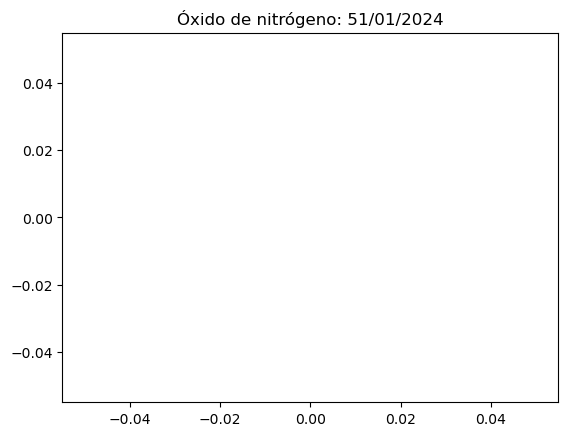

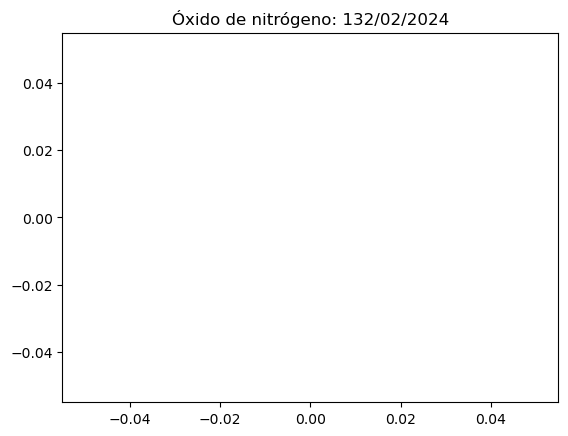

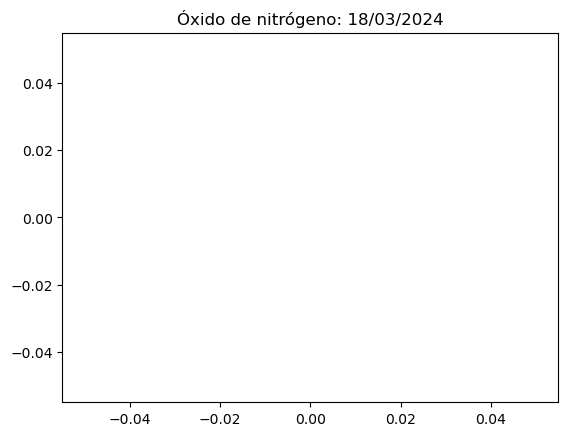

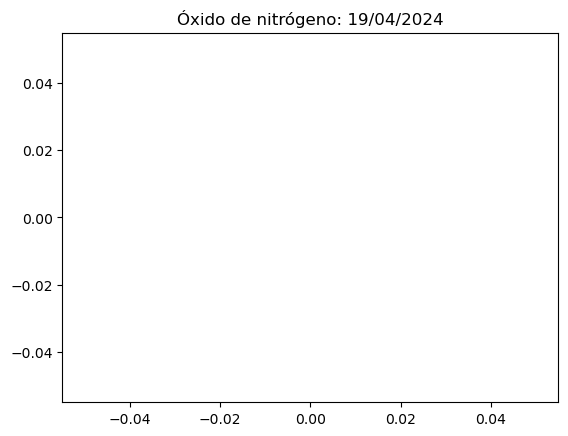

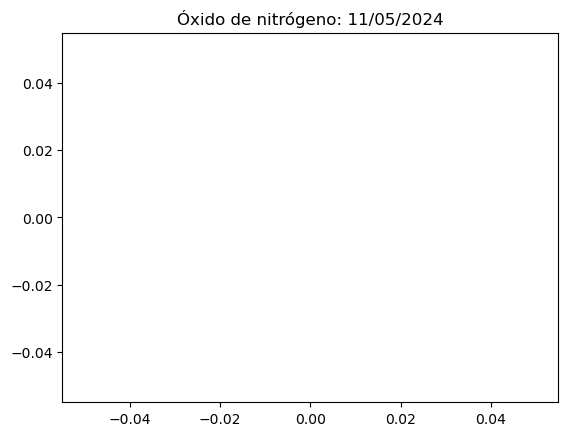

In [ ]:
with open(path + 'calidad-aire-diario.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if (row[0]+row[1]+row[2]=='28079004' and row[3]=='12'):
            plt.title("Óxido de nitrógeno: "
                        +row[8]+"/"+row[7]+"/"+row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            while hora<=23:
                if row[desp+2*hora+1]=='V':
                    vs.append(row[desp+2*hora])
                    horas.append(hora)
                hora +=1
            plt.plot(horas, vs)
            plt.show()


`Ejemplo con descarga manual de fichero .zip`

- https://datos.madrid.es/sites/v/index.jsp?vgnextoid=f3c0f7d512273410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD 

- https://datos.madrid.es/egob/catalogo/201200-10306320-calidad-aire-horario.zip

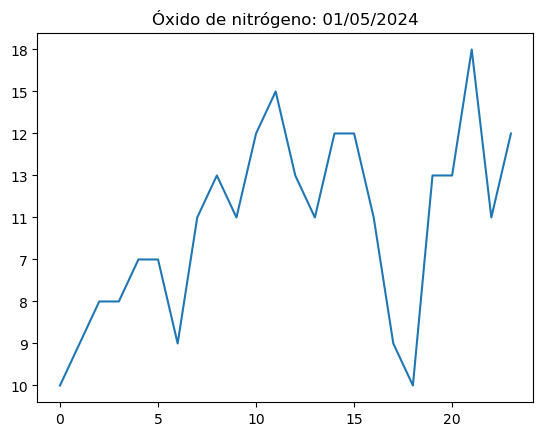

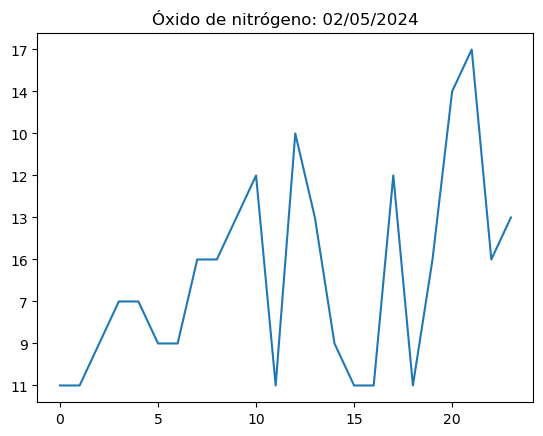

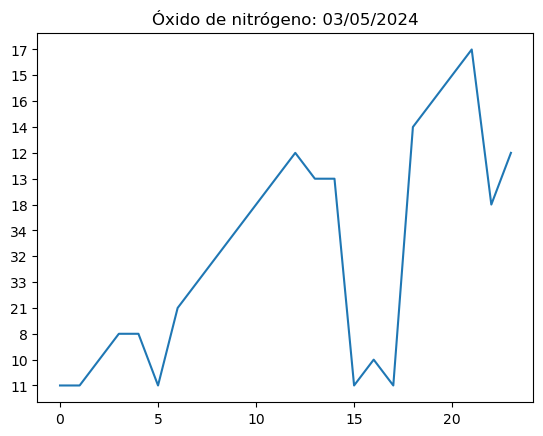

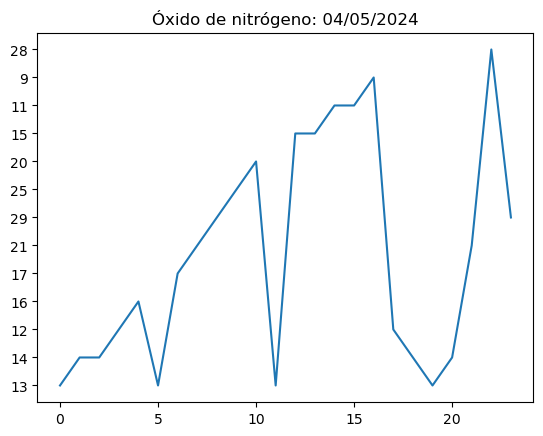

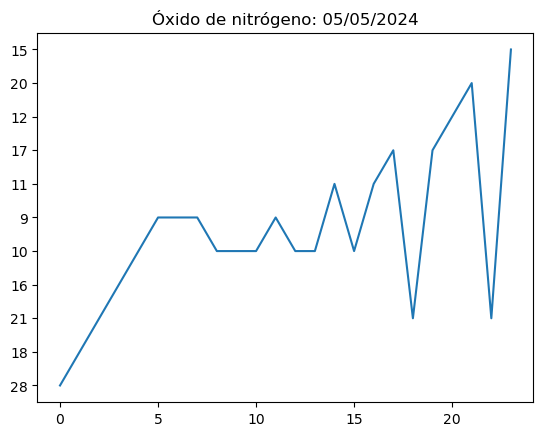

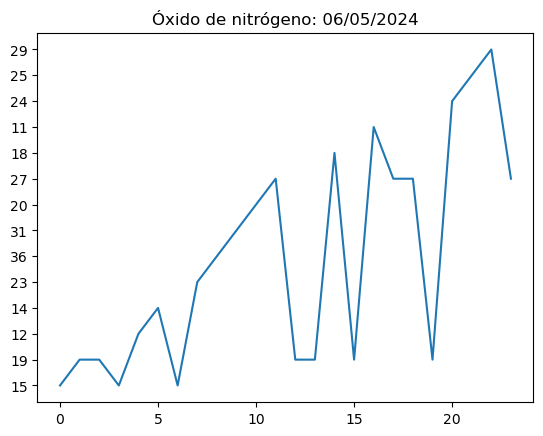

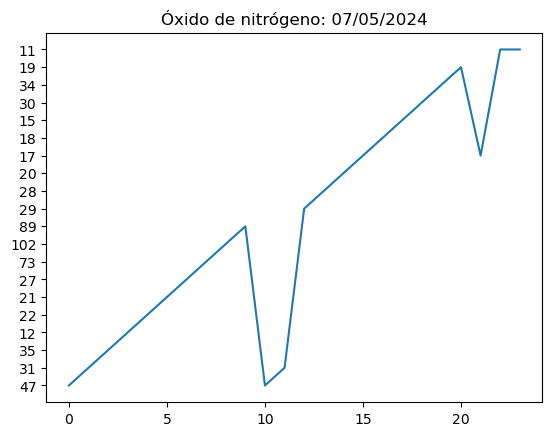

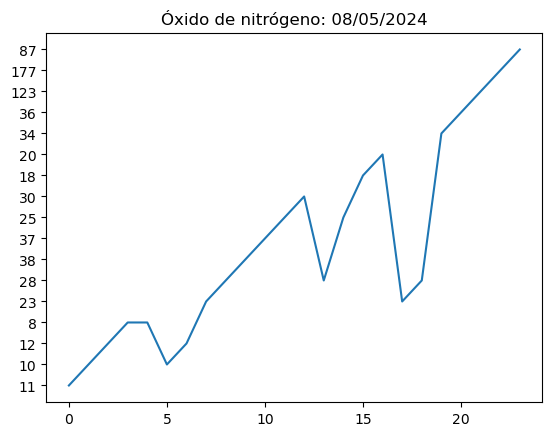

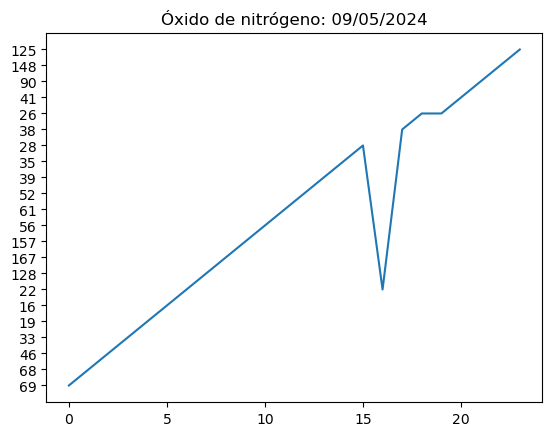

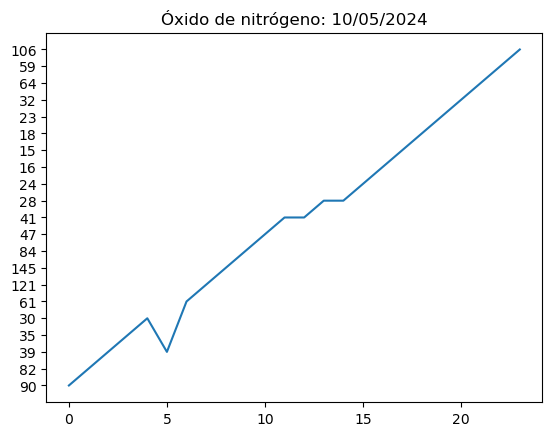

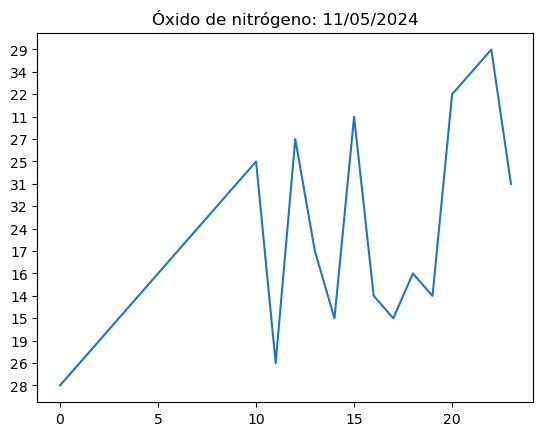

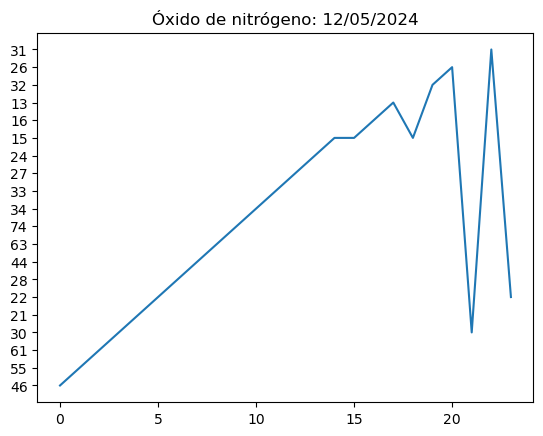

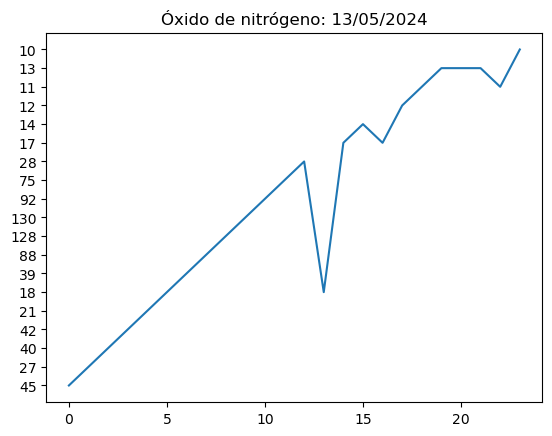

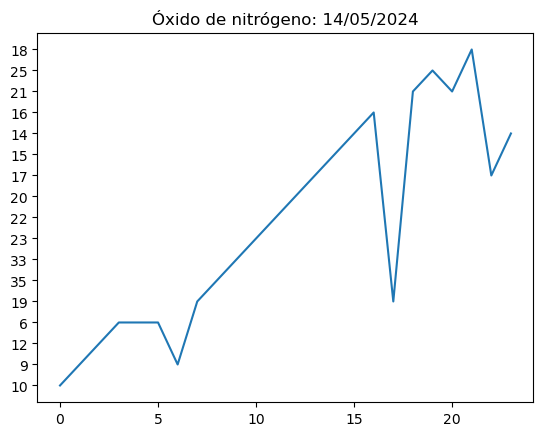

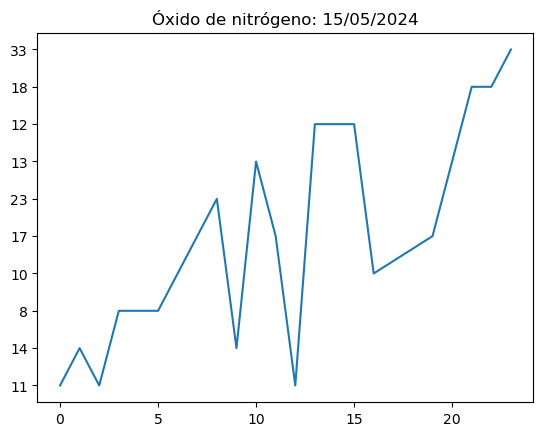

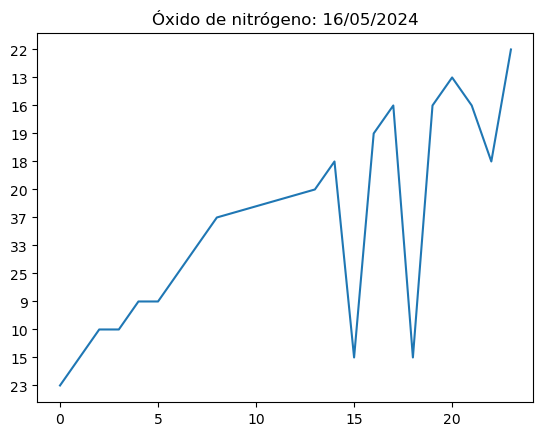

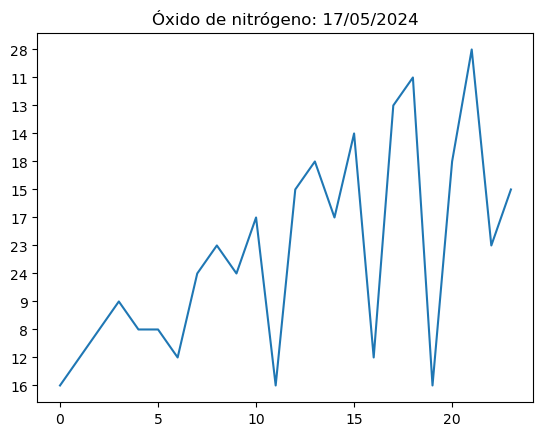

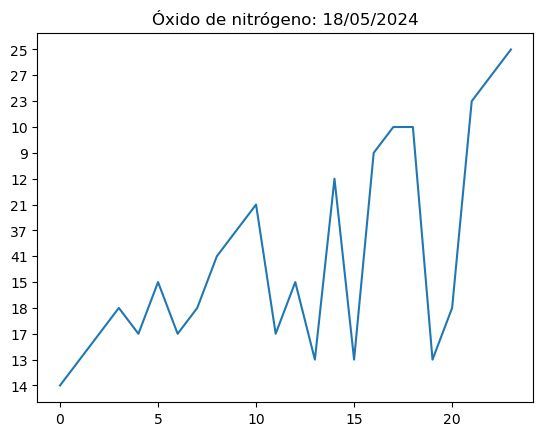

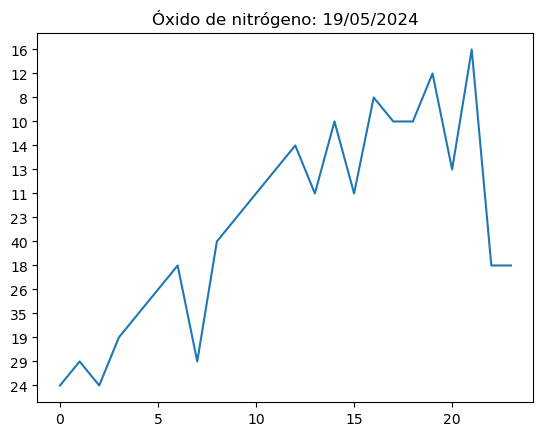

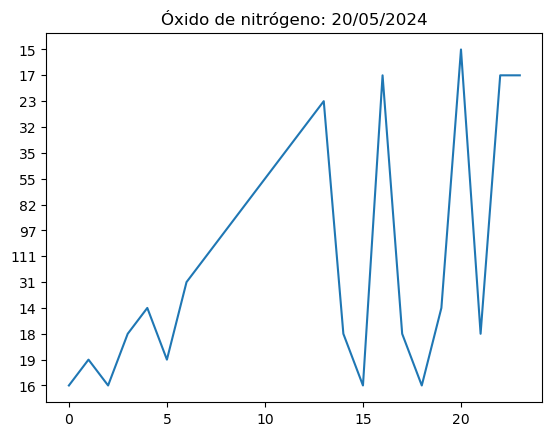

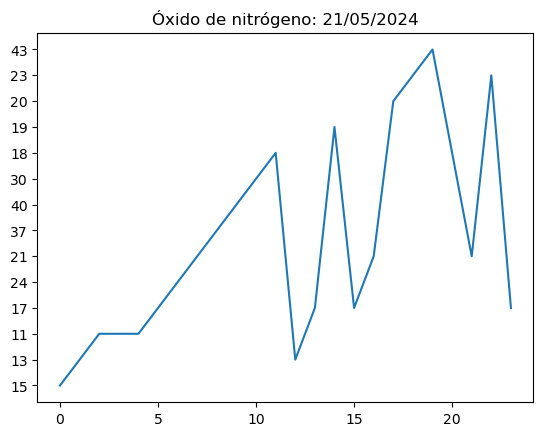

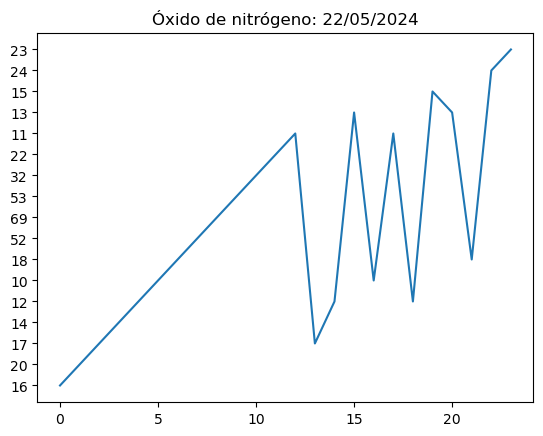

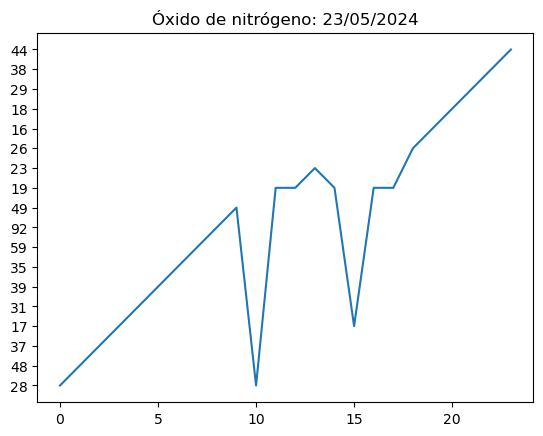

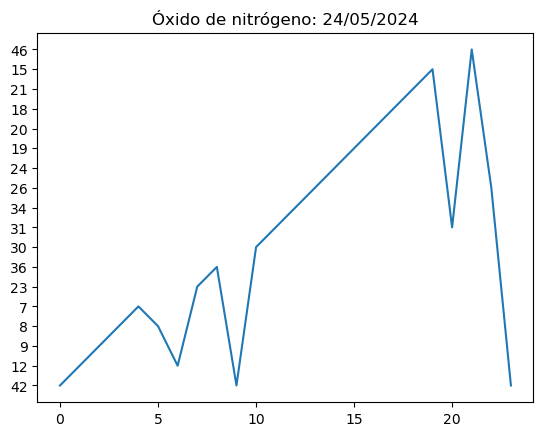

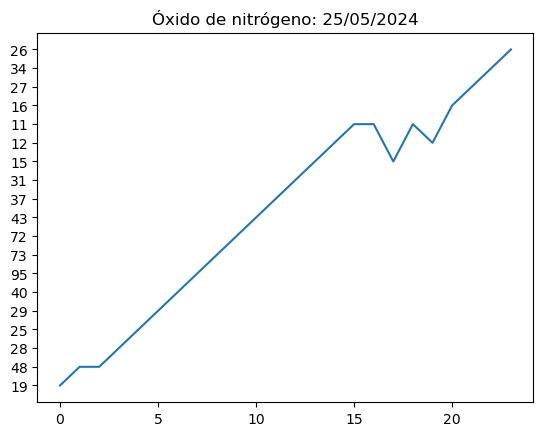

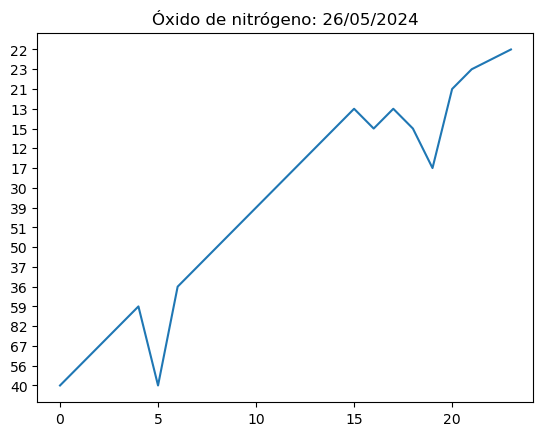

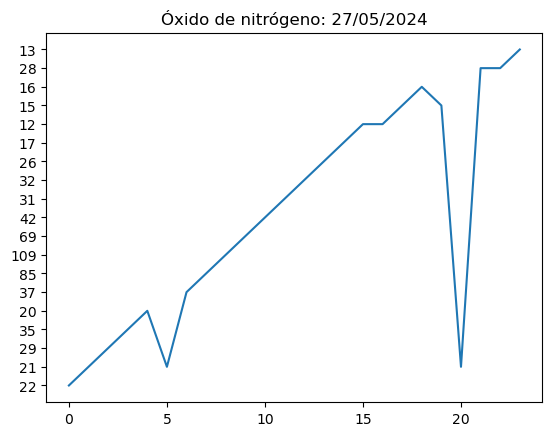

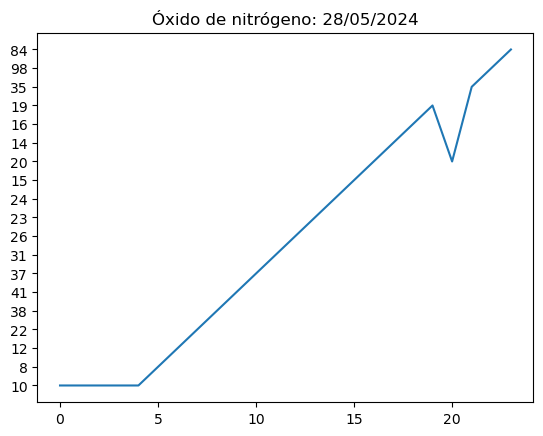

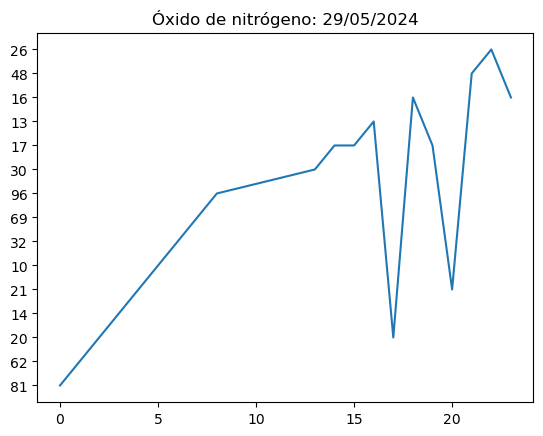

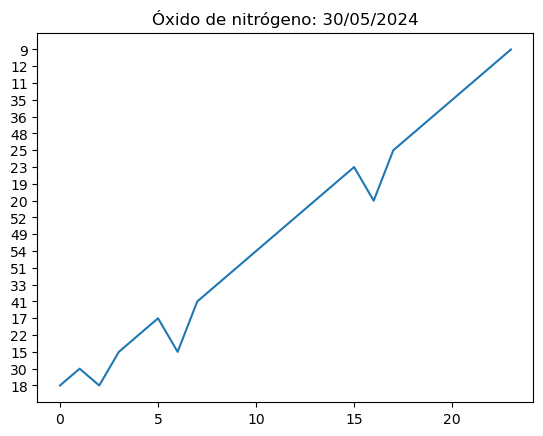

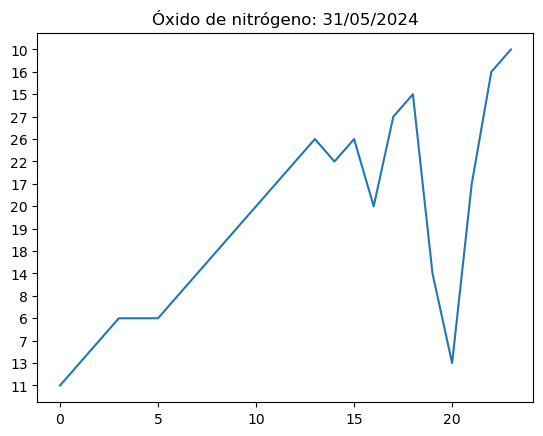

In [ ]:
with open(path + 'Anio24/may_mo24.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if (row[0]+row[1]+row[2]=='28079004' and row[3]=='12'):
            plt.title("Óxido de nitrógeno: "
                        +row[8]+"/"+row[7]+"/"+row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            while hora<=23:
                if row[desp+2*hora+1]=='V':
                    vs.append(row[desp+2*hora])
                    horas.append(hora)
                hora +=1
            plt.plot(horas, vs)
            plt.show()

En ocasiones los ficheros sobre los que queremos trabajar pueden ser realmente grandes, y puede que no nos interese descargarlos completos. En estos casos, podemos utilizar el procesamiento
perezoso, que busca utilizar la menor información posible. Inicialmente, importamos las bibliotecas necesarias:

In [ ]:
import requests
from contextlib import closing
import csv
import codecs
import matplotlib.pyplot as plt

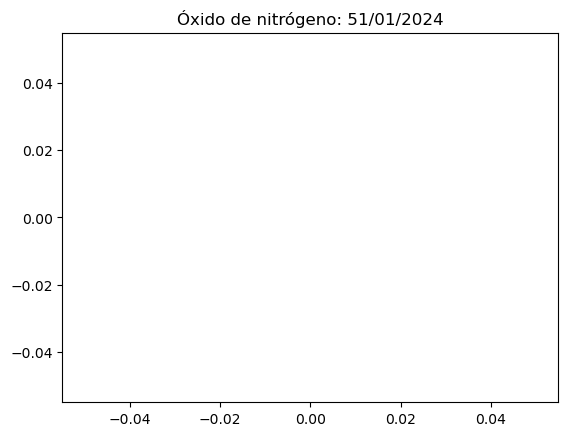

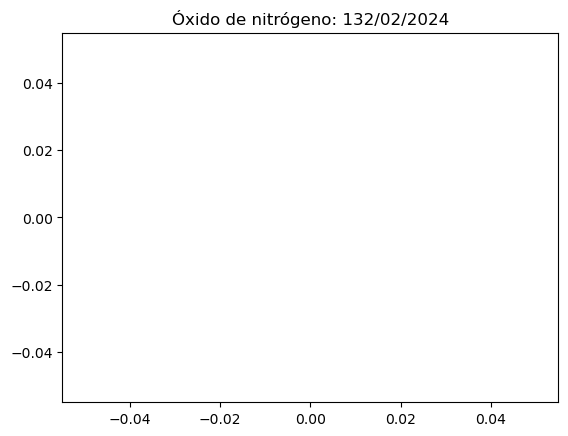

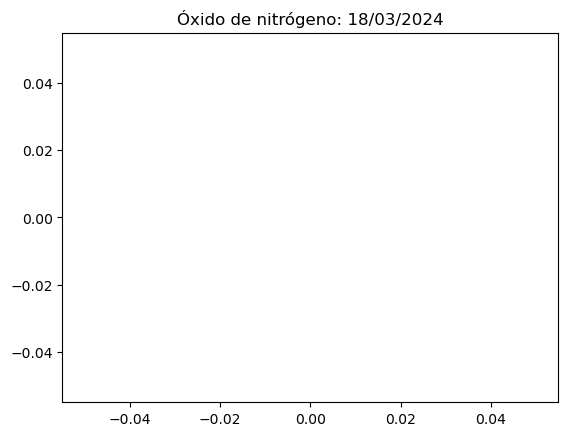

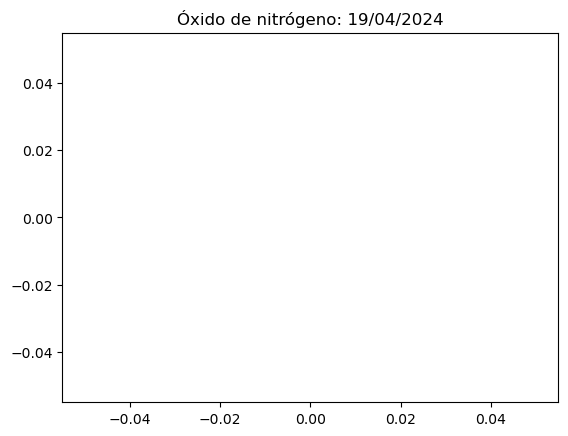

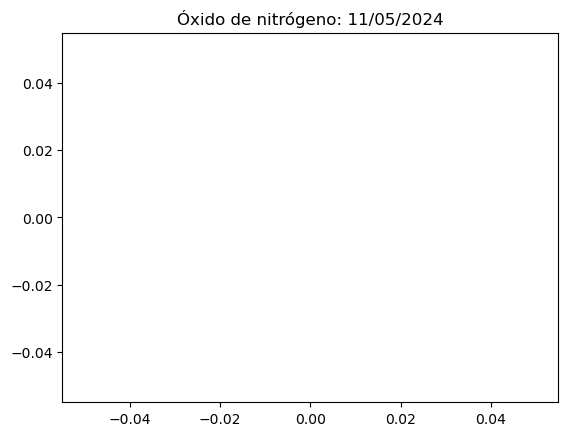

In [ ]:
url = "https://datos.madrid.es/egob/catalogo/201410-10306620-calidad-aire-diario.txt"
with closing(requests.get(url, stream=True)) as r:
    reader = csv.reader(codecs.iterdecode(r.iter_lines(),'utf-8'),delimiter=',')
    for row in reader:
        if (row[0]+row[1]+row[2]=='28079004' and row[3]=='12'):
                    plt.title("Óxido de nitrógeno: "
                                +row[8]+"/"+row[7]+"/"+row[6])
                    hora = 0
                    desp = 9
                    vs = []
                    horas = []
                    while hora<=23:
                        if row[desp+2*hora+1]=='V':
                            vs.append(row[desp+2*hora])
                            horas.append(hora)
                        hora +=1
                    plt.plot(horas, vs)
                    plt.show()    

### 3.DATOS QUE FORMAN PARTE DE LA PÁGINA

<!DOCTYPE html>
<html>
<head>
    <title>
        Un mini ejemplo
    </title>
</head>

<body>
    <div id="date"> Fecha 25/03/2035 </div>
    <div id="content"> Un poco de texto </div>
</body>
</html>    

\<elemento atributo="valor">Contenido</elemento>

In [ ]:
# !pip install beautifulsoup4 # -> installed due Anaconda

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url = r"/home/bytetech/anaconda3/envs/pract28-py-try-exc_xml_webscraping/data/test.html"
with open(url, "r") as f:
    page = f.read()
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Web Scraping
  </title>
  <style>
   body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }
        header, footer {
            background-color: #f4f4f4;
            padding: 10px;
            text-align: center;
        }
        .content {
            padding: 20px;
        }
        .section {
            margin-bottom: 20px;
        }
  </style>
 </head>
 <body>
  <header>
   <h1>
    Introducción al Web Scraping
   </h1>
  </header>
  <div class="content">
   <div class="section">
    <h2>
     ¿Qué es el Web Scraping?
    </h2>
    <p>
     El web scraping es una técnica utilizada para extraer datos de sitios web. Los datos se recogen y se guardan en un formato útil para su análisis o procesamiento.
    </p>
   </div>
   <div id="date">
    <p>
     Martes 02 de Julio de 202

#### Un poco de HTML

##### ELEMENTOS DE FORMATO

- \<b>…\</b>: `negrita`
- \<i>…\</i>: `itálica`
- \<h1>…\</h1> \<h2>…\</h2> \<h3>…\</h3>: `encabezados`
- \<p>…\</p>: `párrafo`
- \<br />:: `salto de línea`
- \<pre>…\</pre>: `preserva el formato`
- \&nbsp; : `espacio en blanco “duro”`
- \<div>…\</div>: `secciones`
- \<span>…\</span>: `similar a <div>…</div>`
- \<ul>…\</ul>: `Lista sin orden`
- \<ol>…\</ol>: `lista ordenada`
- \<a href=”…”>…\</a>: `enlaces`
- \<img src=”…” />: `imágenes`
- \<table>…\</table>: `tablas`
- \<form>…\</form>: `formulario`

#### ATRIBUTOS MÁS USUALES

- `id`: Identifica un elemento dentro de la página.
- `title`: \<h1 title=”cabera principal> Python y Big Data \</h1>
- `class`: asocia un elemento con una hoja de estilo (CSS)
- `style`: \<p style = "font-family:arial; color:#FF0000;"> ...texto...\</p>

#### Navegación absoluta

In [ ]:
hijosDoc = list(soup.children)
print([type(item) for item in hijosDoc])
print(hijosDoc)

[<class 'bs4.element.Doctype'>, <class 'bs4.element.NavigableString'>, <class 'bs4.element.Tag'>, <class 'bs4.element.NavigableString'>]
['html', '\n', <html lang="es">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Web Scraping</title>
<style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }
        header, footer {
            background-color: #f4f4f4;
            padding: 10px;
            text-align: center;
        }
        .content {
            padding: 20px;
        }
        .section {
            margin-bottom: 20px;
        }
    </style>
</head>
<body>
<header>
<h1>Introducción al Web Scraping</h1>
</header>
<div class="content">
<div class="section">
<h2>¿Qué es el Web Scraping?</h2>
<p>El web scraping es una técnica utilizada para extraer datos de sitios web. Los datos se recogen y se guardan en un formato útil para su análisis o procesamient

In [ ]:
html = hijosDoc[2]
print(list(html.children))

['\n', <head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Web Scraping</title>
<style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }
        header, footer {
            background-color: #f4f4f4;
            padding: 10px;
            text-align: center;
        }
        .content {
            padding: 20px;
        }
        .section {
            margin-bottom: 20px;
        }
    </style>
</head>, '\n', <body>
<header>
<h1>Introducción al Web Scraping</h1>
</header>
<div class="content">
<div class="section">
<h2>¿Qué es el Web Scraping?</h2>
<p>El web scraping es una técnica utilizada para extraer datos de sitios web. Los datos se recogen y se guardan en un formato útil para su análisis o procesamiento.</p>
</div>
<div id="date">
<p>Martes 02 de Julio de 2024</p>
</div>
<div class="section">
<h2>Herramientas Comunes</h2>
<p>Algunas de las herramientas m

In [ ]:
body = list(html.children)[3]
print(list(body.children))

['\n', <header>
<h1>Introducción al Web Scraping</h1>
</header>, '\n', <div class="content">
<div class="section">
<h2>¿Qué es el Web Scraping?</h2>
<p>El web scraping es una técnica utilizada para extraer datos de sitios web. Los datos se recogen y se guardan en un formato útil para su análisis o procesamiento.</p>
</div>
<div id="date">
<p>Martes 02 de Julio de 2024</p>
</div>
<div class="section">
<h2>Herramientas Comunes</h2>
<p>Algunas de las herramientas más utilizadas para realizar web scraping incluyen:</p>
<ul>
<li>BeautifulSoup</li>
<li>Scrapy</li>
<li>Selenium</li>
</ul>
</div>
<div class="section">
<h2>Aplicaciones del Web Scraping</h2>
<p>El web scraping se puede utilizar para:</p>
<ul>
<li>Recopilar datos para análisis de mercado</li>
<li>Monitorear precios en tiendas en línea</li>
<li>Extraer datos de redes sociales</li>
</ul>
</div>
</div>, '\n', <footer>
<p>© 2024 Web Scraping Tutorial</p>
</footer>, '\n']


In [ ]:
divDate = list(body.children)[1]

In [ ]:
print(divDate.get_text())


Introducción al Web Scraping



#### Navegación relativa

In [ ]:
divs = soup.find_all("div")

In [ ]:
print(divs[0].get_text())



¿Qué es el Web Scraping?
El web scraping es una técnica utilizada para extraer datos de sitios web. Los datos se recogen y se guardan en un formato útil para su análisis o procesamiento.


Martes 02 de Julio de 2024


Herramientas Comunes
Algunas de las herramientas más utilizadas para realizar web scraping incluyen:

BeautifulSoup
Scrapy
Selenium



Aplicaciones del Web Scraping
El web scraping se puede utilizar para:

Recopilar datos para análisis de mercado
Monitorear precios en tiendas en línea
Extraer datos de redes sociales





In [ ]:
print(soup.find("div").get_text())



¿Qué es el Web Scraping?
El web scraping es una técnica utilizada para extraer datos de sitios web. Los datos se recogen y se guardan en un formato útil para su análisis o procesamiento.


Martes 02 de Julio de 2024


Herramientas Comunes
Algunas de las herramientas más utilizadas para realizar web scraping incluyen:

BeautifulSoup
Scrapy
Selenium



Aplicaciones del Web Scraping
El web scraping se puede utilizar para:

Recopilar datos para análisis de mercado
Monitorear precios en tiendas en línea
Extraer datos de redes sociales





In [ ]:
print(soup.find("div", id="date").get_text())


Martes 02 de Julio de 2024



In [ ]:
print(soup.select("html div")[0].get_text())



¿Qué es el Web Scraping?
El web scraping es una técnica utilizada para extraer datos de sitios web. Los datos se recogen y se guardan en un formato útil para su análisis o procesamiento.


Martes 02 de Julio de 2024


Herramientas Comunes
Algunas de las herramientas más utilizadas para realizar web scraping incluyen:

BeautifulSoup
Scrapy
Selenium



Aplicaciones del Web Scraping
El web scraping se puede utilizar para:

Recopilar datos para análisis de mercado
Monitorear precios en tiendas en línea
Extraer datos de redes sociales





#### Ejemplo: día y hora oficiales

https://www.boe.es/informacion/hora_oficial.php

In [ ]:
import requests
url = "https://www.boe.es/informacion/hora_oficial.php"
# old-web -> "https://www.boe.es/sede_electronica/informacion/hora_oficial.php"
r = requests.get(url)
print(r)

<Response [200]>


In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, "html.parser")
centrador = soup.find("p",class_="centrador")
print(list(centrador.children)[0].get_text())

miércoles,  3 de julio de 2024, 11:22:01


### 4.DATOS QUE REQUIEREN INTERACCIÓN

https://www1.sedecatastro.gob.es/CYCBienInmueble/OVCBusqueda.aspx

#### Selenium: instalación y carga de páginas

`1ª Parte`

In [ ]:
# !pip install selenium # -> Installed due Anaconda

`2ª Parte`

- Firefox, cuyo cliente para Selenium es llamado geckodriver. Podemos
descargarlo en:
https://github.com/mozilla/geckodriver/releases
- Google Chrome: el cliente para Selenium, llamado chromedriver, se puede obtener en:
https://github.com/SeleniumHQ/selenium/wiki/ChromeDriver

Hay más drivers, en la página de Selenium: Opera, Safari,
Android, Edge y muchos otros.

In [ ]:
from selenium import webdriver

In [ ]:
driver = webdriver.Chrome()
url = "https://www1.sedecatastro.gob.es/CYCBienInmueble/OVCBusqueda.aspx" 
driver.get(url)

#### ACCESO AL DRIVER INCORPORANDO LA RUTA EN EL CÓDIGO PYTHON

In [ ]:



from selenium import webdriver
from selenium.webdriver.chrome.service import Service

chromedriver_path = "/usr/local/bin/chromedriver"
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)



#### Clic en un enlace

In [ ]:
from selenium.webdriver.common.by import By
# coord = driver.find_element_by_link_text("COORDENADAS")
coord = driver.find_element(By.LINK_TEXT, "COORDENADAS")
coord.click()

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

wait = WebDriverWait(driver, 10)
coord = wait.until(EC.visibility_of_element_located((By.LINK_TEXT, "COORDENADAS")))
coord.click()


#### Cómo escribir texto

__Ejemplo del libro Deprecado__

In [ ]:
lat=driver.find_element_by_id("ctl00_Contenido_txtLatitud")
lon=driver.find_element_by_id("ctl00_Contenido_txtLongitud")

AttributeError: 'WebDriver' object has no attribute 'find_element_by_id'

In [ ]:
lat = driver.find_element(By.ID, "ctl00_Contenido_txtLatitud")
lon = driver.find_element(By.ID, "ctl00_Contenido_txtLongitud")

In [ ]:
latitud = "28.2723368"
longitud = "-16.6600606"
lat.send_keys(latitud)
lon.send_keys(longitud)

#### Pulsando botones

In [ ]:
datos=driver.find_element_by_id("ctl00_Contenido_btnDatos")

AttributeError: 'WebDriver' object has no attribute 'find_element_by_id'

In [ ]:
datos=driver.find_element(By.ID, "ctl00_Contenido_btnDatos")
datos.click()

Si en algún momento queremos `volver a la página anterior`, lo más fácil es utilizar
un poco de JavaScript ejecutado desde el propio driver:

In [ ]:
driver.execute_script("window.history.go(-1)")

Si en algún momento queremos `avanzar`:

In [ ]:
driver.execute_script("window.history.go(+1)")

#### Localizar elementos

__Deprecadas__

- `find_element_by_id()`: encuentra el primer elemento cuyo atributo id se
le indica.
- `find_element_by_name()`: análogo, pero buscando un elemento con
atributo name.
- `find_element_by_class_name()`: análogo, pero buscando el valor del
atributo class.
- `find_element_by_xpath()`: búsqueda utilizando sintaxis XPath, que
veremos en seguida.
- `find_element_by_link_text()`: primer elemento <a…>text</a> según el
valor text.
- `find_element_by_partial_link_text()`: análogo, pero usa un prefijo del
texto.
- `find_element_by_tag_name()`: primer elemento con el nombre indicado.
- `find_element_by_css_selector()`: búsqueda utilizando la sintaxis CSS.

__Funciones Versión Reciente__

__from selenium.webdriver.common.by import By__

- `driver.find_element(By.ID, 'element_id')`
- `driver.find_element(By.NAME, 'element_name')`
- `driver.find_element(By.CLASS_NAME, 'element_class')`
- `driver.find_element(By.XPATH, 'element_xpath')`
- `driver.find_element(By.LINK_TEXT, 'link_text')`
- `driver.find_element(By.PARTIAL_LINK_TEXT, 'partial_link_text')`
- `driver.find_element(By.TAG_NAME, 'tag_name')`
- `driver.find_element(By.CSS_SELECTOR, 'css_selector')`

Equivalente que encuentra no en el primer
elemento, sino en todos los elementos que verifiquen la condición dada

__Función Deprecada__

In [ ]:
driver.find_element_by_tag_name('div')

AttributeError: 'WebDriver' object has no attribute 'find_element_by_tag_name'

__Función Actual__

In [ ]:
from selenium.webdriver.common.by import By

driver.find_element(By.TAG_NAME, 'div')

<selenium.webdriver.remote.webelement.WebElement (session="40caa7f19856df2a8e2fa9d96c38d229", element="f.E27BDCE98AC770F5A7CC3516EE78A6D0.d.C7E4D0E268FB6AA0F78E1E7FAA6D2765.e.1210")>

#### XPath

Lenguaje de consultas que permite obtener información a partir de
documentos XML. Selenium lo utiliza para “navegar” por las páginas HTML

Para descripción en detalle:

- https://www.w3schools.com/xml/xpath_intro.asp

- https://www.w3.org/TR/xpath/

##### COMPONENTE "/"

In [ ]:
#html = driver.find_element_by_xpath("/html") # -> DEPRECADO
html = driver.find_element(By.XPATH, '/html')
print(html.text)

Formulario master
Toggle navigation
Icono página de inicio
Consulta y certificación de Bien Inmueble
Volver
Toggle navigation
DATOS DESCRIPTIVOS DEL INMUEBLE
Referencia catastral
38026A035000010000EI    
Localización
Polígono 35 Parcela 1 PARQUE NACINAL DEL TEIDE
MONTE. LA OROTAVA (S.C. TENERIFE)
Clase
Rústico
Uso principal
Agrario
Superficie construida
3.704 m2
Año construcción
1965
PARCELA CATASTRAL

Parcela construida sin división horizontal
Localización
Polígono 35 Parcela 1 PARQUE NACINAL DEL TEIDE
MONTE. LA OROTAVA (S.C. TENERIFE)
Superficie gráfica
73.628.811 m2
CONSTRUCCIÓN
Uso principal Escalera Planta Puerta Superficie m2 Tipo Reforma Fecha Reforma
AGRARIO 40
OCIO HOSTEL. 00 01 328
OCIO HOSTEL. 00 02 360
OCIO HOSTEL. 00 03 265
VIVIENDA 00 01 309
ALMACEN 00 01 117
ALMACEN 00 02 162
COMERCIO 00 01 1.107
COMERCIO 00 02 323
VIVIENDA 00 03 174
VIVIENDA 00 01 303
VIVIENDA 00 01 50
ALMACEN 00 03 38
ALMACEN 00 04 90
ALMACEN 00 05 38
CULTIVO
Subparcela Cultivo/Aprovechamiento Intensid

In [ ]:
# head = driver.find_element_by_xpath("/html/head") # deprecado
# body = driver.find_element_by_xpath("/html/body") # deprecado

head = driver.find_element(By.XPATH,"/html/head")
body = driver.find_element(By.XPATH,"/html/body")

No debemos pues pensar que la variable obtenida “contiene” el elemento, sino más bien que “señala” al elemento.

Utilizamos body y no driver como punto de partida.

Funciona porque Selenium simplemente va a la raíz del
documento al que apunta body, que es el documento contenido en driver, y
devuelve el elemento html.

In [ ]:
# html2 = body.find_element_by_xpath("/html") # deprecado

html2 = body.find_element(By.XPATH, "/html")

Esta idea de los “señaladores” nos lleva a entender que si ahora
cambiamos la página contenida en el driver, la variable body dejará de tener un
contenido válido, porque “apuntará” a un código que ya no existe

In [ ]:
driver.execute_script("window.history.go(-1)")
print(body.text)

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=126.0.6478.126); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
#0 0x5c7c521b1c7a <unknown>
#1 0x5c7c51e94e2c <unknown>
#2 0x5c7c51ea5504 <unknown>
#3 0x5c7c51ea5e6a <unknown>
#4 0x5c7c51e9af25 <unknown>
#5 0x5c7c51e99259 <unknown>
#6 0x5c7c51e9c2e5 <unknown>
#7 0x5c7c51e9c36c <unknown>
#8 0x5c7c51edb822 <unknown>
#9 0x5c7c51f045c2 <unknown>
#10 0x5c7c51ed5ad9 <unknown>
#11 0x5c7c51f0478e <unknown>
#12 0x5c7c51f23303 <unknown>
#13 0x5c7c51f04363 <unknown>
#14 0x5c7c51ed4247 <unknown>
#15 0x5c7c51ed4b9e <unknown>
#16 0x5c7c5217824b <unknown>
#17 0x5c7c5217c2f1 <unknown>
#18 0x5c7c52163afe <unknown>
#19 0x5c7c5217ce52 <unknown>
#20 0x5c7c5214879f <unknown>
#21 0x5c7c521a1638 <unknown>
#22 0x5c7c521a1810 <unknown>
#23 0x5c7c521b0dac <unknown>
#24 0x75f9aea9ca94 <unknown>
#25 0x75f9aeb29c3c <unknown>


##### COMPONENTE “*”

Cuando no nos importa el nombre del elemento concreto, podemos utilizar “*”,
que representa a cualquier hijo a partir del punto en el que se encuentre la ruta.

In [ ]:
# hijos = driver.find_elements_by_xpath("/html/body/*") # deprecado
hijos =  driver.find_elements(By.XPATH,"/html/body/*")
for element in hijos:
    print(element.tag_name)

div
div
form
div
script
a
script
link
script
script
script


Cantidad de elementos de tipo `div` presentes:

In [ ]:
divs = driver.find_elements(By.XPATH, "/html/body/*/div")
print(len(divs))

3


##### COMPONENTE "."

El punto sirve para indicar que el camino sigue desde la posición actual.

Obtener los “nietos” de tipo div del elemento body:

In [ ]:
# divs = body.find_elements_by_xpath("./*/div") # deprecado

divs = body.find_elements(By.XPATH, "./*/div")
print(len(divs))

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=126.0.6478.126); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
#0 0x5c7c521b1c7a <unknown>
#1 0x5c7c51e94e2c <unknown>
#2 0x5c7c51ea5504 <unknown>
#3 0x5c7c51ea5e6a <unknown>
#4 0x5c7c51e9af25 <unknown>
#5 0x5c7c51e99259 <unknown>
#6 0x5c7c51e9c2e5 <unknown>
#7 0x5c7c51e9c36c <unknown>
#8 0x5c7c51ee121e <unknown>
#9 0x5c7c51ee1751 <unknown>
#10 0x5c7c51ed5f73 <unknown>
#11 0x5c7c51f045ed <unknown>
#12 0x5c7c51ed5ad9 <unknown>
#13 0x5c7c51f0478e <unknown>
#14 0x5c7c51f23303 <unknown>
#15 0x5c7c51f04363 <unknown>
#16 0x5c7c51ed4247 <unknown>
#17 0x5c7c51ed4b9e <unknown>
#18 0x5c7c5217824b <unknown>
#19 0x5c7c5217c2f1 <unknown>
#20 0x5c7c52163afe <unknown>
#21 0x5c7c5217ce52 <unknown>
#22 0x5c7c5214879f <unknown>
#23 0x5c7c521a1638 <unknown>
#24 0x5c7c521a1810 <unknown>
#25 0x5c7c521b0dac <unknown>
#26 0x75f9aea9ca94 <unknown>
#27 0x75f9aeb29c3c <unknown>


##### COMPONENTE "//"

Las dos barras consecutivas se usan para saltar varios niveles.

Indica que buscamos elementos a cualquier nivel dentro del documento.

In [ ]:
# divs = driver.find_elements_by_xpath("/html/body//div") # deprecado

divs = driver.find_elements(By.XPATH, "/html/body//div")
print(len(divs))

163


In [ ]:
# labels = driver.find_elements_by_xpath("//label") # deprecado

labels = driver.find_elements(By.XPATH, "//label")
print(len(labels))

19


In [ ]:
id = "ctl00_Contenido_tblInmueble"
# div = driver.find_element_by_id(id) # deprecado
div = driver.find_element(By.ID, id)
# label = div.find_element_by_xpath("//label") # deprecado
label = div.find_element(By.XPATH, "//label")
print(label.text)

38026A035000010000EI    


##### FILTROS [ … ]

Permiten indicar condiciones
adicionales que deben cumplir los elementos seleccionados.

In [ ]:
# e = driver.find_elements_by_xpath("(//label)[position()=3]") # deprecado
e = driver.find_elements(By.XPATH, "(//label)[position()=4]")
print(e[0].text)

Polígono 35 Parcela 1 PARQUE NACINAL DEL TEIDE
MONTE. LA OROTAVA (S.C. TENERIFE)


In [ ]:
e = driver.find_elements(By.XPATH,"(//label)[5]")
print(e[0].text)

Rústico


In [ ]:
# etiqs = driver.find_elements_by_xpath("//label") # deprecado
etiqs = driver.find_elements(By.XPATH, "//label")
print(etiqs[3].text)

Polígono 35 Parcela 1 PARQUE NACINAL DEL TEIDE
MONTE. LA OROTAVA (S.C. TENERIFE)


In [ ]:
# ulti = driver.find_elements_by_xpath("(//label)[last()]") # deprecado
ulti = driver.find_elements(By.XPATH, "(//label)[last()]")
print(ulti[0].text)

__Búsqueda por atributo__

In [ ]:
xpath = "//label[@class='control-label black text-left']"
# etiqs = driver.find_elements_by_xpath(xpath) # deprecado
etiqs = driver.find_elements(By.XPATH, xpath)
print(etiqs[0].text)

38026A035000010000EI    


__Búsqueda compleja__

In [ ]:
xpath = "//*[./span/text()='Referencia catastral']//label"
# etiq = driver.find_element_by_xpath(xpath) # deprecado
etiq = driver.find_element(By.XPATH, xpath)
print(etiq.text)

38026A035000010000EI    


##### Navegadores headless

Arrancar en modo headless, es decir, sin interfaz gráfica.

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--window-size=1920x1080')
# driver = webdriver.Chrome(chrome_options=chrome_options) # deprecado
driver = webdriver.Chrome(options=chrome_options)

Ejemplo __ChatGPT__

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Configurar opciones
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--window-size=1920x1080')

# Inicializar el driver con las opciones actualizadas
driver = webdriver.Chrome(options=chrome_options)

# Usar el driver para automatizar tareas
driver.get('https://www.google.com')
print(driver.title)
driver.quit()


Google


#### REFERENCIAS

- Documentación de la biblioteca BeautifulSoup (accedido el 30/06/2018).
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

- Documentación de la biblioteca Selenium (accedido el 30/06/2018).
https://www.seleniumhq.org/docs/

- Ryan Mitchell. Web Scraping with Python: Collecting More Data from the
Modern Web. 2ª edición. O'Reilly Media, 2018.

- Richard Lawson. Web Scraping with Python (Community Experience
Distilled). Packt, 2015.

- Mark Collin. Mastering Selenium WebDriver. Packt, 2015.

- Vineeth G. Nair. Getting Started with Beautiful Soup. Pack. 201